In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss


#Memuat dataset
data = pd.read_csv('/kaggle/input/train-csv/train - train.csv')

#Memeriksa informasi dan nilai yang hilang
print(data.info())
print(data.isnull().sum())

#Salin data asli sebelum imputasi
data_nn = data.copy()

#Mengisi nilai yang hilang
imp = SimpleImputer(strategy="most_frequent")
data[[ "Age", "Embarked"]] = imp.fit_transform(data[['Age', 'Embarked']])

#Mengonversi kolom kategorikal menjadi numerik
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

#Mamisahkan fitur dan target
X = data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])

#Menghapus kolom yang tidak digunakan 
y = data[ 'Survived'] # Kolom target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [32]:
# Menbagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


#membagi data latih menjadi data latih dan validasi
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state=42)


#Normalisasi fitur

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [33]:
# #Menbuat model MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(20, 60, 40), max_iter=1000)

# #Melatih model 
# mlp.fit(X_train, y_train)

# #Melakukan prediksi pada data 
# predictions = mlp.predict(X_test)

# #manampilkan akurasi dalam persen accuracy percent 
# accuracy_percent = accuracy_score(y_test, predictions) *100
# print("Accuracy: {:.2f}%",format(accuracy_percent))


# #Menampilkan confusion matrix 
# print(confusion_matrix(y_test,predictions)) 

# #menampilkan laporan klasifikasi 
# print(classification_report(y_test,predictions))

In [38]:
#Menbuat model MLPClassifier
import numpy as np

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

train_loss = []
val_loss = []

for epoch in range(1000):
    # Partial fit for online learning
    mlp.partial_fit(X_train, y_train, classes=[0,1])
    
    # Record training loss
    train_loss.append(mlp.loss_)
    
    # Predict probabilities for validation set
    val_predictions = mlp.predict_proba(X_val)
    
    # Compute validation loss (cross-entropy)
    val_loss_epoch = -(y_val * np.log(val_predictions[:, 1]) + (1 - y_val) * np.log(1 - val_predictions[:, 1])).mean()
    val_loss.append(val_loss_epoch)

# Predict on test set
predictions = mlp.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))
 
    
# #manampilkan akurasi dalam persen accuracy percent 
# accuracy_percent = accuracy_score(y_test, predictions) *100
# print("Accuracy: {:.2f}%",format(accuracy_percent))


# #Menampilkan confusion matrix 
# print(confusion_matrix(y_test,predictions)) 

# #menampilkan laporan klasifikasi 
# print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



accuracy : 82.68%
[[91 14]
 [17 57]]


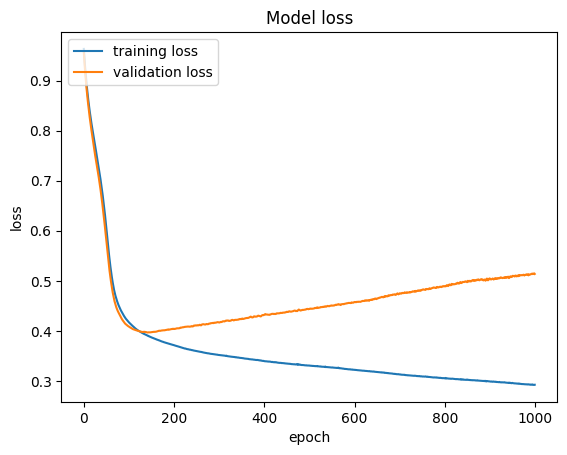

In [39]:
import matplotlib.pyplot as plt

accuracy_percent = accuracy_score(y_test, predictions) * 100
print("accuracy : {:.2f}%".format(accuracy_percent))

print(confusion_matrix(y_test, predictions))

plt.plot(train_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title('Model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Import libraries yang diperlukan 
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error, r2_score

#Membuat model MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

#Melatih model 
mlp.fit(X_train, y_train)

#Melakukan prediksi pada data uji
predictions = mlp.predict(X_test)

# Menampilkan metrik regresi
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions) 
print('Mean Squared Error: {:.2f}'.format(mse)) 
print('R^2 Score: {:.2f}'.format(r2))

#Jika Anda ingin mengonversi prediksi kembali ke kategori (binary) 
predictions_binary = (predictions > 0.5).astype(int)

#Menampilkan confusion matrix
from sklearn.metrics import confusion_matrix, classification_report 
print(confusion_matrix(y_test, predictions_binary)) 
print(classification_report(y_test, predictions_binary))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

# Melakukan cross validation pada model Decision Tree
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

print("Hasil Cross Validation Model Decision Tree: {:.2f}%".format(dt_scores.mean() * 100))